In [1]:
from griffis_soccer_analysis.fbref_code import *
import pandas as pd
from scipy import stats
import math
from math import pi
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [2]:
df = pd.read_csv('../Final FBRef Next 12 Leagues.csv')
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,pAdjAerialWinsPer90,pAdjAerialLossPer90,pAdjDrbPastAttPer90,TouchCentrality,Tkl+IntPer600OppTouch,pAdjTouchesPer90,CarriesPer50Touches,ProgCarriesPer50Touches,ProgPassesPer50CmpPasses,Main Position
0,Aaron Anselmino,ar ARG,"MF,DF",Boca Juniors,Copa de la Liga,18,2005,1,0,29.0,...,0.000000,0.000000,0.000000,6.335877,3.653674,34.166403,0.250000,0.000000,0.166667,NaN
1,Aaron Nicolás Molinas,ar ARG,MF,Defensa y Just,Copa de la Liga,23,2000,3,0,77.0,...,0.000000,0.000000,4.780496,11.851462,4.055983,62.901873,0.472727,0.036364,0.176471,NaN
2,Aaron Quirós,ar ARG,DF,Banfield,Copa de la Liga,22,2001,9,9,803.0,...,8.992806,5.395683,0.907120,9.750918,2.074229,53.515533,0.575472,0.004717,0.071970,NaN
3,Abel Hernández,uy URU,FW,Rosario Central,Copa de la Liga,33,1990,4,4,324.0,...,11.928429,16.898608,0.552242,4.105353,1.268288,21.517997,0.324675,0.000000,0.057143,Centre-Forward
4,Abiel Osorio,ar ARG,"FW,MF",Vélez Sarsfield,Copa de la Liga,21,2002,8,0,159.0,...,7.829978,14.541387,1.266304,6.368183,3.404982,33.778020,0.606061,0.030303,0.035714,NaN


In [3]:
df.Pos.value_counts()

#posiciones de los jugadores

Pos
DF       220
MF       171
FW       103
MF,FW     87
FW,MF     79
GK        43
DF,MF     36
MF,DF     19
DF,FW      9
FW,DF      4
Name: count, dtype: int64

In [4]:
df.Min.describe()

#valores que se concideran en el dataframe respecto del tiempo

count     771.000000
mean      503.837873
std       387.411793
min         1.000000
25%       150.500000
50%       431.000000
75%       839.500000
max      1260.000000
Name: Min, dtype: float64

In [5]:
mediocampistas = df[(df['Pos'].str.contains('MF') == True) &  (df['Min'] > 350 )].reset_index(drop=True)
mediocampistas

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,pAdjAerialWinsPer90,pAdjAerialLossPer90,pAdjDrbPastAttPer90,TouchCentrality,Tkl+IntPer600OppTouch,pAdjTouchesPer90,CarriesPer50Touches,ProgCarriesPer50Touches,ProgPassesPer50CmpPasses,Main Position
0,Adrián Guillermo Sánchez,ar ARG,MF,Atlé Tucumán,Copa de la Liga,24,1999,12,11,943.0,...,18.218623,16.194332,2.608180,10.618995,5.367756,53.567162,0.471831,0.024648,0.169811,NaN
1,Adrián Sporle,ar ARG,"DF,MF",Independiente,Copa de la Liga,28,1995,8,4,400.0,...,2.304147,5.760369,0.777650,10.963596,3.952203,56.250000,0.462898,0.024735,0.144654,NaN
2,Agustín Almendra,ar ARG,MF,Racing Club,Copa de la Liga,23,2000,11,10,698.0,...,3.409091,1.136364,3.370018,10.392451,6.402214,53.533054,0.518280,0.010753,0.130597,NaN
3,Agustín Bouzat,ar ARG,MF,Vélez Sarsfield,Copa de la Liga,29,1994,12,8,733.0,...,12.304251,21.252796,3.158849,11.364873,4.874745,60.281387,0.517495,0.025783,0.170347,NaN
4,Agustín Cardozo,ar ARG,"MF,DF",Tigre,Copa de la Liga,26,1997,14,14,1248.0,...,27.217742,14.112903,1.453939,11.112562,2.825197,62.027816,0.550173,0.018454,0.092754,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Walter Mazzantti,ar ARG,"FW,MF",Huracán,Copa de la Liga,27,1996,12,12,899.0,...,3.125000,15.625000,2.711346,6.285592,3.300093,32.632412,0.651917,0.088496,0.104895,NaN
192,William Alarcón,cl CHI,MF,Huracán,Copa de la Liga,23,2000,13,13,1101.0,...,14.583333,9.375000,1.617847,9.628885,2.309680,49.989520,0.578616,0.026730,0.210084,NaN
193,Yonatan Rodríguez,uy URU,MF,Gimnasia–LP,Copa de la Liga,30,1993,10,6,538.0,...,14.340344,6.692161,2.079083,8.909986,2.699893,48.572631,0.433213,0.007220,0.164634,NaN
194,Yvo Calleros,uy URU,MF,Banfield,Copa de la Liga,25,1998,14,14,1175.0,...,36.870504,25.179856,3.099648,9.037018,5.276387,49.597470,0.333913,0.001739,0.098039,NaN


In [6]:
list(df.columns)

['Player',
 'Nation',
 'Pos',
 'Squad',
 'Comp',
 'Age',
 'Born',
 'MP',
 'Starts',
 'Min',
 'G+A',
 'Glsxx',
 'Goals',
 'Shots',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'AvgShotDistance',
 'FKShots',
 'PK',
 'PKsAtt',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'npG-xG',
 'PassesCompleted',
 'PassesAttempted',
 'TotCmp%',
 'TotalPassDist',
 'ProgPassDist',
 'ShortPassCmp',
 'ShortPassAtt',
 'ShortPassCmp%',
 'MedPassCmp',
 'MedPassAtt',
 'MedPassCmp%',
 'LongPassCmp',
 'LongPassAtt',
 'LongPassCmp%',
 'Assists',
 'xAG',
 'xA',
 'A-xAG',
 'KeyPasses',
 'Final1/3Cmp',
 'PenAreaCmp',
 'CrsPenAreaCmp',
 'ProgPasses',
 'LivePass',
 'DeadPass',
 'FKPasses',
 'ThruBalls',
 'Switches',
 'Crs',
 'ThrowIn',
 'CK',
 'InSwingCK',
 'OutSwingCK',
 'StrCK',
 'Cmpxxx',
 'PassesToOff',
 'PassesBlocked',
 'SCA',
 'SCA90',
 'SCAPassLive',
 'SCAPassDead',
 'SCADrib',
 'SCASh',
 'SCAFld',
 'SCADef',
 'GCA',
 'GCA90',
 'GCAPassLive',
 'GCAPassDead',
 'GCADrib',
 'GCASh',
 'GCAFld',
 'GCADef',
 

In [7]:
lista_valores = [
    'Player',
    'Squad',
    'TklPer90',
 'TklWinPossPer90',
 'Def3rdTklPer90',
 'Mid3rdTklPer90',
 'Att3rdTklPer90',
 'DrbTklPer90',
 'DrbPastAttPer90',
 'DrbTkl%Per90',
 'DrbPastPer90',
 'BlocksPer90',
 'ShBlocksPer90',
 'PassBlocksPer90',
 'IntPer90',
 'Tkl+IntPer90',
 'ClrPer90',
 'ErrPer90',
 'RecovPer90',
 'pAdjShBlocksPer90',
 'pAdjPassBlocksPer90',
 'pAdjIntPer90',
 'pAdjDrbTklPer90',
 'pAdjTklWinPossPer90',
 'pAdjDrbPastPer90',
 'pAdjAerialWinsPer90',
 'pAdjAerialLossPer90',
]

In [8]:
mediocampistas[lista_valores].reset_index(drop=True)

,Player,Squad,TklPer90,TklWinPossPer90,Def3rdTklPer90,Mid3rdTklPer90,Att3rdTklPer90,DrbTklPer90,DrbPastAttPer90,DrbTkl%Per90,...,ErrPer90,RecovPer90,pAdjShBlocksPer90,pAdjPassBlocksPer90,pAdjIntPer90,pAdjDrbTklPer90,pAdjTklWinPossPer90,pAdjDrbPastPer90,pAdjAerialWinsPer90,pAdjAerialLossPer90
0,Adrián Guillermo Sánchez,Atlé Tucumán,3.054083,2.004242,0.858961,2.099682,0.095440,1.431601,2.576882,5.306469,...,0.000000,75.0,0.193199,1.545588,1.545588,1.448989,1.448989,1.159191,18.218623,16.194332
1,Adrián Sporle,Independiente,1.350000,0.900000,1.125000,0.225000,0.000000,0.450000,0.675000,15.007500,...,0.000000,27.0,0.518433,1.814516,2.073733,0.518433,0.518433,0.259217,2.304147,5.760369
2,Agustín Almendra,Racing Club,3.739255,2.191977,1.676218,1.934097,0.128940,1.547278,2.965616,6.730659,...,0.000000,52.0,0.293045,2.197838,1.611748,1.758270,1.758270,1.611748,3.409091,1.136364
3,Agustín Bouzat,Vélez Sarsfield,2.824011,1.350614,1.350614,1.227831,0.245566,0.982265,2.824011,4.272851,...,0.000000,67.0,0.274683,1.785436,1.373413,1.098730,1.098730,2.060119,12.304251,21.252796
4,Agustín Cardozo,Tigre,1.586538,1.009615,0.721154,0.793269,0.072115,0.576923,1.442308,2.884615,...,0.144231,93.0,0.436182,0.654273,1.017757,0.581576,0.581576,0.872364,27.217742,14.112903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Walter Mazzantti,Huracán,2.402670,1.501669,0.800890,0.800890,0.800890,1.101224,2.602892,4.234705,...,0.000000,52.0,0.000000,1.564238,0.417130,1.147108,1.147108,1.564238,3.125000,15.625000
192,William Alarcón,Huracán,1.226158,0.408719,0.408719,0.572207,0.245232,0.817439,1.553134,4.299728,...,0.000000,61.0,0.000000,0.255450,0.766349,0.851499,0.851499,0.766349,14.583333,9.375000
193,Yonatan Rodríguez,Gimnasia–LP,2.342007,1.840149,0.836431,1.338290,0.167286,1.003717,2.174721,7.728625,...,0.167286,32.0,0.319859,0.639718,0.159929,0.959577,0.959577,1.119506,14.340344,6.692161
194,Yvo Calleros,Banfield,3.370213,2.297872,1.302128,1.914894,0.153191,1.761702,3.446809,3.914043,...,0.000000,55.0,0.275524,0.619930,1.584265,1.584265,1.584265,1.515383,36.870504,25.179856


In [9]:
mediosdef = mediocampistas[lista_valores].reset_index(drop=True).fillna(0)
params = list(mediosdef.columns)
params = params[1:]
jugadores = list(mediosdef.Player.unique())
df_ponderado = pd.DataFrame(columns=['Nombre','KPI'])

for jugador in jugadores:
    player = mediosdef.loc[mediosdef['Player'] == jugador].reset_index()
    player = list(player.loc[0])
    player = player[2:]

    values = []

    for x in range(len(params)):
        values.append(math.floor(stats.percentileofscore(mediosdef[params[x]],player[x])) )
        diccionario = {}
        diccionario = {
            jugador: np.mean(values)
        }
        df= pd.DataFrame(list(diccionario.items()), columns=['Nombre','KPI'])
        df_ponderado = pd.concat([df_ponderado, df])


In [10]:
df_ponderado

,Nombre,KPI
0,Adrián Guillermo Sánchez,3.000000
0,Adrián Guillermo Sánchez,42.500000
0,Adrián Guillermo Sánchez,57.000000
0,Adrián Guillermo Sánchez,58.000000
0,Adrián Guillermo Sánchez,65.000000
...,...,...
0,Éver Banega,40.409091
0,Éver Banega,40.260870
0,Éver Banega,42.333333
0,Éver Banega,42.320000


In [11]:
mediosdef = mediocampistas[lista_valores].reset_index(drop=True).fillna(0)

params = list(mediosdef.columns)
params = params[1:]
jugadores = list(mediosdef.Player.unique())
df_ponderado = pd.DataFrame(columns=['Nombre'] + params)

for jugador in jugadores:
    player = mediosdef.loc[mediosdef['Player'] == jugador].reset_index()
    player_values = list(player.loc[0])
    player_values = player_values[1:]

    percentiles = []
    for x in range(len(params)):
        percentile = math.floor(stats.percentileofscore(mediosdef[params[x]], player_values[x+1]))
        percentiles.append(percentile)

    diccionario = {'Nombre': jugador}
    diccionario.update({params[i]: percentiles[i] for i in range(len(params))})

    df = pd.DataFrame([diccionario])
    df_ponderado = pd.concat([df_ponderado, df], ignore_index=True)
    df_ponderado

In [12]:
df_ponderado

,Nombre,Squad,TklPer90,TklWinPossPer90,Def3rdTklPer90,Mid3rdTklPer90,Att3rdTklPer90,DrbTklPer90,DrbPastAttPer90,DrbTkl%Per90,...,ErrPer90,RecovPer90,pAdjShBlocksPer90,pAdjPassBlocksPer90,pAdjIntPer90,pAdjDrbTklPer90,pAdjTklWinPossPer90,pAdjDrbPastPer90,pAdjAerialWinsPer90,pAdjAerialLossPer90
0,Adrián Guillermo Sánchez,3,82,86,61,93,20,78,65,52,...,45,88,58,88,90,80,80,50,93,86
1,Adrián Sporle,48,27,31,77,5,8,15,4,98,...,45,23,92,95,98,19,19,3,17,26
2,Agustín Almendra,70,96,93,93,89,26,83,79,67,...,45,68,77,98,93,89,89,75,28,2
3,Agustín Bouzat,98,75,57,86,65,54,55,72,34,...,45,82,73,93,85,64,64,87,75,93
4,Agustín Cardozo,93,34,38,47,38,17,23,22,10,...,96,97,85,23,66,24,24,31,96,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Walter Mazzantti,44,67,68,54,40,97,61,67,33,...,45,68,18,89,28,66,66,71,24,83
191,William Alarcón,44,19,6,24,22,53,42,25,36,...,45,76,18,6,55,44,44,22,85,51
192,Yonatan Rodríguez,37,63,80,58,71,38,57,51,76,...,98,32,80,21,7,54,54,47,84,31
193,Yvo Calleros,7,90,94,84,88,35,90,89,23,...,45,71,74,19,92,84,84,70,98,95


In [13]:
mediosdef = mediocampistas[lista_valores].reset_index(drop=True).fillna(0)

params = list(mediosdef.columns)
params = params[2:]  # Excluir 'Player' y 'Equipo' de los parámetros
jugadores = list(mediosdef.Player.unique())
df_ponderado = pd.DataFrame(columns=['Nombre', 'Squad'] + params)

for jugador in jugadores:
    player = mediosdef.loc[mediosdef['Player'] == jugador].reset_index()
    equipo = player.loc[0, 'Squad']  # Obtener el nombre del equipo
    player_values = player.loc[0, params].values  # Obtener los valores de los parámetros

    percentiles = []
    for x in range(len(params)):
        percentile = math.floor(stats.percentileofscore(mediosdef[params[x]], player_values[x]))
        percentiles.append(percentile)

    diccionario = {'Nombre': jugador, 'Equipo': equipo}
    diccionario.update({params[i]: percentiles[i] for i in range(len(params))})

    df = pd.DataFrame([diccionario])
    df_ponderado = pd.concat([df_ponderado, df], ignore_index=True)

# Cálculo de la puntuación agregada
df_ponderado['Puntuacion_Total'] = df_ponderado[params].sum(axis=1)

# Reorganizar las columnas para que 'Puntuacion_Total' esté después de 'Equipo'
columnas_ordenadas = ['Nombre', 'Equipo', 'Puntuacion_Total'] + params
df_ponderado = df_ponderado[columnas_ordenadas]

# Ordenar el DataFrame basado en la puntuación total
df_ponderado = df_ponderado.sort_values(by='Puntuacion_Total', ascending=False).reset_index(drop=True)

In [14]:
df_ponderado

,Nombre,Equipo,Puntuacion_Total,TklPer90,TklWinPossPer90,Def3rdTklPer90,Mid3rdTklPer90,Att3rdTklPer90,DrbTklPer90,DrbPastAttPer90,...,ErrPer90,RecovPer90,pAdjShBlocksPer90,pAdjPassBlocksPer90,pAdjIntPer90,pAdjDrbTklPer90,pAdjTklWinPossPer90,pAdjDrbPastPer90,pAdjAerialWinsPer90,pAdjAerialLossPer90
0,Franco Ibarra,Rosario Central,2224,99,99,98,97,95,100,100,...,45,36,100,99,97,100,100,100,61,21
1,Rodrigo Fernández,Newell's OB,2085,89,94,76,89,62,95,97,...,99,97,91,65,82,94,94,93,82,58
2,Bruno Zuculini,Racing Club,1976,95,83,92,87,21,88,95,...,98,84,65,88,65,92,92,95,89,84
3,Lucas Blondel,Boca Juniors,1960,79,90,90,68,48,93,88,...,100,12,88,95,75,95,95,76,57,30
4,Elian Irala,San Lorenzo,1957,97,96,89,95,56,96,97,...,45,92,55,81,69,94,94,94,93,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Luciano Ferreyra,Platense,440,3,1,18,1,61,9,28,...,45,39,18,15,3,8,8,56,2,0
191,Santiago Coronel,Barracas Central,420,2,11,3,18,8,7,1,...,45,25,18,26,12,6,6,2,5,4
192,Nahuel Bustos,Talleres,413,2,0,8,4,60,9,4,...,45,0,18,13,3,9,9,7,34,51
193,Silvio Romero,Instituto,373,6,6,55,1,8,4,2,...,45,14,18,3,3,4,4,4,46,18


In [15]:
# Grupo 1 de columnas para el primer total
grupo_1 = [
    'TklPer90',
    'TklWinPossPer90',
    'Def3rdTklPer90',
    'Mid3rdTklPer90',
    'Att3rdTklPer90',
    'DrbTklPer90',
    'DrbPastAttPer90',
    'DrbTkl%Per90',
    'DrbPastPer90',
    'BlocksPer90',
    'ShBlocksPer90',
    'PassBlocksPer90',
    'IntPer90',
    'Tkl+IntPer90',
    'ClrPer90',
    'ErrPer90',
    'RecovPer90'
]

# Grupo 2 de columnas para el segundo total
grupo_2 = [
    'pAdjShBlocksPer90',
    'pAdjPassBlocksPer90',
    'pAdjIntPer90',
    'pAdjDrbTklPer90',
    'pAdjTklWinPossPer90',
    'pAdjDrbPastPer90',
    'pAdjAerialWinsPer90',
    'pAdjAerialLossPer90'
]

mediosdef = mediocampistas[lista_valores].reset_index(drop=True).fillna(0)
jugadores = list(mediosdef.Player.unique())
df_ponderado = pd.DataFrame(columns=['Nombre', 'Equipo'] + grupo_1 + grupo_2)

for jugador in jugadores:
    player = mediosdef.loc[mediosdef['Player'] == jugador].reset_index()
    equipo = player.loc[0, 'Squad']  # Obtener el nombre del equipo
    player_values_grupo_1 = player.loc[0, grupo_1].values  # Obtener los valores de los parámetros del grupo 1
    player_values_grupo_2 = player.loc[0, grupo_2].values  # Obtener los valores de los parámetros del grupo 2

    percentiles_grupo_1 = []
    for x in range(len(grupo_1)):
        percentile = math.floor(stats.percentileofscore(mediosdef[grupo_1[x]], player_values_grupo_1[x]))
        percentiles_grupo_1.append(percentile)

    percentiles_grupo_2 = []
    for x in range(len(grupo_2)):
        percentile = math.floor(stats.percentileofscore(mediosdef[grupo_2[x]], player_values_grupo_2[x]))
        percentiles_grupo_2.append(percentile)

    diccionario = {'Nombre': jugador, 'Equipo': equipo}
    diccionario.update({grupo_1[i]: percentiles_grupo_1[i] for i in range(len(grupo_1))})
    diccionario.update({grupo_2[i]: percentiles_grupo_2[i] for i in range(len(grupo_2))})

    df = pd.DataFrame([diccionario])
    df_ponderado = pd.concat([df_ponderado, df], ignore_index=True)

# Cálculo de las puntuaciones totales
df_ponderado['Puntuacion_Total_Grupo_1'] = df_ponderado[grupo_1].sum(axis=1)
df_ponderado['Puntuacion_Total_Grupo_2'] = df_ponderado[grupo_2].sum(axis=1)

# Reorganizar las columnas para que 'Puntuacion_Total_Grupo_1' y 'Puntuacion_Total_Grupo_2' estén después de 'Equipo'
columnas_ordenadas = ['Nombre', 'Equipo', 'Puntuacion_Total_Grupo_1', 'Puntuacion_Total_Grupo_2'] + grupo_1 + grupo_2
df_ponderado = df_ponderado[columnas_ordenadas]

# Ordenar el DataFrame basado en la puntuación total del Grupo 1 (puedes cambiar esto según tus necesidades)
df_ponderado = df_ponderado.sort_values(by='Puntuacion_Total_Grupo_1', ascending=False).reset_index(drop=True)

In [16]:
df_ponderado

,Nombre,Equipo,Puntuacion_Total_Grupo_1,Puntuacion_Total_Grupo_2,TklPer90,TklWinPossPer90,Def3rdTklPer90,Mid3rdTklPer90,Att3rdTklPer90,DrbTklPer90,...,ErrPer90,RecovPer90,pAdjShBlocksPer90,pAdjPassBlocksPer90,pAdjIntPer90,pAdjDrbTklPer90,pAdjTklWinPossPer90,pAdjDrbPastPer90,pAdjAerialWinsPer90,pAdjAerialLossPer90
0,Franco Ibarra,Rosario Central,1546,678,99,99,98,97,95,100,...,45,36,100,99,97,100,100,100,61,21
1,Rodrigo Fernández,Newell's OB,1426,659,89,94,76,89,62,95,...,99,97,91,65,82,94,94,93,82,58
2,Lucas Blondel,Boca Juniors,1349,611,79,90,90,68,48,93,...,100,12,88,95,75,95,95,76,57,30
3,Ignacio Fernández,Boca Juniors,1334,614,93,69,81,93,40,96,...,45,62,94,91,83,97,97,98,44,10
4,Agustín Almendra,Racing Club,1327,551,96,93,93,89,26,83,...,45,68,77,98,93,89,89,75,28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Silvio Romero,Instituto,273,100,6,6,55,1,8,4,...,45,14,18,3,3,4,4,4,46,18
191,Nahuel Bustos,Talleres,269,144,2,0,8,4,60,9,...,45,0,18,13,3,9,9,7,34,51
192,Lenny Lobato,Vélez Sarsfield,265,246,0,5,3,14,8,1,...,45,12,18,24,71,1,1,32,26,73
193,Luca Langoni,Boca Juniors,244,110,3,10,20,1,63,3,...,45,7,18,7,19,3,3,28,2,30


In [17]:
mediosdef = mediocampistas[lista_valores].reset_index(drop=True).fillna(0)
jugadores = list(mediosdef.Player.unique())

# DataFrame para grupo 1
df_grupo_1 = pd.DataFrame(columns=['Nombre', 'Equipo'] + grupo_1)

# DataFrame para grupo 2
df_grupo_2 = pd.DataFrame(columns=['Nombre', 'Equipo'] + grupo_2)

for jugador in jugadores:
    player = mediosdef.loc[mediosdef['Player'] == jugador].reset_index()
    equipo = player.loc[0, 'Squad']  # Obtener el nombre del equipo

    # Calcular percentiles para el grupo 1
    player_values_grupo_1 = player.loc[0, grupo_1].values  # Obtener los valores de los parámetros del grupo 1
    percentiles_grupo_1 = []
    for x in range(len(grupo_1)):
        percentile = math.floor(stats.percentileofscore(mediosdef[grupo_1[x]], player_values_grupo_1[x]))
        percentiles_grupo_1.append(percentile)
    diccionario_grupo_1 = {'Nombre': jugador, 'Equipo': equipo}
    diccionario_grupo_1.update({grupo_1[i]: percentiles_grupo_1[i] for i in range(len(grupo_1))})
    df1 = pd.DataFrame([diccionario_grupo_1])
    df_grupo_1 = pd.concat([df_grupo_1, df1], ignore_index=True)

    # Calcular percentiles para el grupo 2
    player_values_grupo_2 = player.loc[0, grupo_2].values  # Obtener los valores de los parámetros del grupo 2
    percentiles_grupo_2 = []
    for x in range(len(grupo_2)):
        percentile = math.floor(stats.percentileofscore(mediosdef[grupo_2[x]], player_values_grupo_2[x]))
        percentiles_grupo_2.append(percentile)
    diccionario_grupo_2 = {'Nombre': jugador, 'Equipo': equipo}
    diccionario_grupo_2.update({grupo_2[i]: percentiles_grupo_2[i] for i in range(len(grupo_2))})
    df2 = pd.DataFrame([diccionario_grupo_2])
    df_grupo_2 = pd.concat([df_grupo_2, df2], ignore_index=True)

# Cálculo de las puntuaciones totales
df_grupo_1['Puntuacion_Total_Grupo_1'] = df_grupo_1[grupo_1].sum(axis=1)
df_grupo_2['Puntuacion_Total_Grupo_2'] = df_grupo_2[grupo_2].sum(axis=1)

# Ordenar los DataFrames basados en las puntuaciones totales
df_grupo_1 = df_grupo_1.sort_values(by='Puntuacion_Total_Grupo_1', ascending=False).reset_index(drop=True)
df_grupo_2 = df_grupo_2.sort_values(by='Puntuacion_Total_Grupo_2', ascending=False).reset_index(drop=True)


In [18]:
df_grupo_1

,Nombre,Equipo,TklPer90,TklWinPossPer90,Def3rdTklPer90,Mid3rdTklPer90,Att3rdTklPer90,DrbTklPer90,DrbPastAttPer90,DrbTkl%Per90,DrbPastPer90,BlocksPer90,ShBlocksPer90,PassBlocksPer90,IntPer90,Tkl+IntPer90,ClrPer90,ErrPer90,RecovPer90,Puntuacion_Total_Grupo_1
0,Franco Ibarra,Rosario Central,99,99,98,97,95,100,100,90,100,100,100,100,97,100,90,45,36,1546
1,Rodrigo Fernández,Newell's OB,89,94,76,89,62,95,97,41,94,81,91,64,83,89,85,99,97,1426
2,Lucas Blondel,Boca Juniors,79,90,90,68,48,93,88,91,71,95,86,92,70,79,97,100,12,1349
3,Ignacio Fernández,Boca Juniors,93,69,81,93,40,96,99,77,97,95,92,90,80,90,35,45,62,1334
4,Agustín Almendra,Racing Club,96,93,93,89,26,83,79,67,66,96,73,97,87,97,72,45,68,1327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Silvio Romero,Instituto,6,6,55,1,8,4,2,67,4,3,18,4,3,3,30,45,14,273
191,Nahuel Bustos,Talleres,2,0,8,4,60,9,4,60,7,9,18,11,3,1,28,45,0,269
192,Lenny Lobato,Vélez Sarsfield,0,5,3,14,8,1,6,1,24,14,18,18,65,12,19,45,12,265
193,Luca Langoni,Boca Juniors,3,10,20,1,63,3,10,6,23,6,18,7,17,4,1,45,7,244


In [19]:
df_grupo_2

,Nombre,Equipo,pAdjShBlocksPer90,pAdjPassBlocksPer90,pAdjIntPer90,pAdjDrbTklPer90,pAdjTklWinPossPer90,pAdjDrbPastPer90,pAdjAerialWinsPer90,pAdjAerialLossPer90,Puntuacion_Total_Grupo_2
0,Kevin Ortíz,Rosario Central,89,73,99,85,85,99,86,88,704
1,Enzo Pérez,Estudiantes,80,70,96,81,81,87,96,94,685
2,Franco Ibarra,Rosario Central,100,99,97,100,100,100,61,21,678
3,Christian Ordoñez,Vélez Sarsfield,90,91,85,72,72,83,88,91,672
4,Santiago Ascacíbar,Estudiantes,76,63,93,96,96,72,88,88,672
...,...,...,...,...,...,...,...,...,...,...,...
190,Cristian Ferreira,San Lorenzo,18,9,22,7,7,0,7,41,111
191,Luciano Ferreyra,Platense,18,15,3,8,8,56,2,0,110
192,Luca Langoni,Boca Juniors,18,7,19,3,3,28,2,30,110
193,Silvio Romero,Instituto,18,3,3,4,4,4,46,18,100


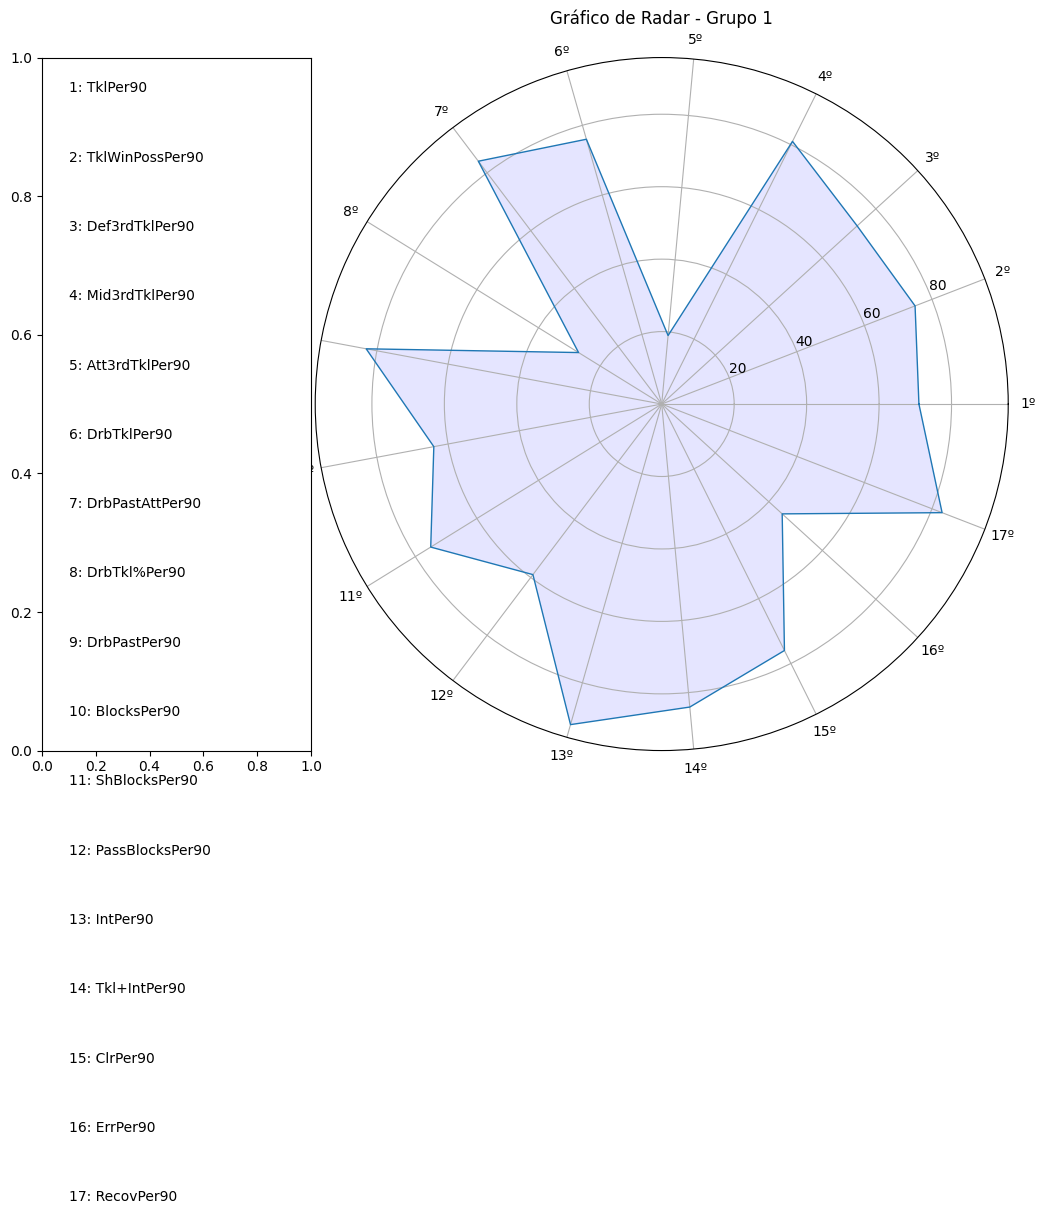

In [20]:
# Filtrar datos de Enzo Perez
enzoperez_grupo_1 = df_grupo_1[df_grupo_1['Nombre'] == 'Enzo Pérez']
enzoperez_grupo_2 = df_grupo_2[df_grupo_2['Nombre'] == 'Enzo Pérez']

# Función para crear el gráfico de radar
def crear_radar(df, grupo, nombre_grupo):
    categorias = grupo
    N = len(categorias)
    etiquetas_personalizadas = [f'{i+1}º' for i in range(N)]

    valores = df[categorias].values.flatten().tolist()
    valores += valores[:1]

    # Calcula los ángulos de los ejes del radar
    angulos = [n / float(N) * 2 * pi for n in range(N)]
    angulos += angulos[:1]

    # Inicializa el gráfico de radar
    ax = plt.subplot(111, polar=True)

    # Dibuja uno por uno los ejes con las etiquetas
    plt.xticks(angulos[:-1], etiquetas_personalizadas)

    # Dibuja los valores
    ax.plot(angulos, valores, linewidth=1, linestyle='solid')

    # Rellena el área
    ax.fill(angulos, valores, 'b', alpha=0.1)

    # Añade el título
    plt.title(f'Gráfico de Radar - {nombre_grupo}')

    ax1 = plt.subplot(141)

    for i, categoria in enumerate(categorias):
        plt.text(0.1, 0.95 - i * 0.1, f'{i+1}: {categoria}', transform=ax1.transAxes, fontsize=10)

    

    
    

# Crear los gráficos de radar
plt.figure(figsize=(16, 9))


crear_radar(enzoperez_grupo_1, grupo_1, 'Grupo 1')



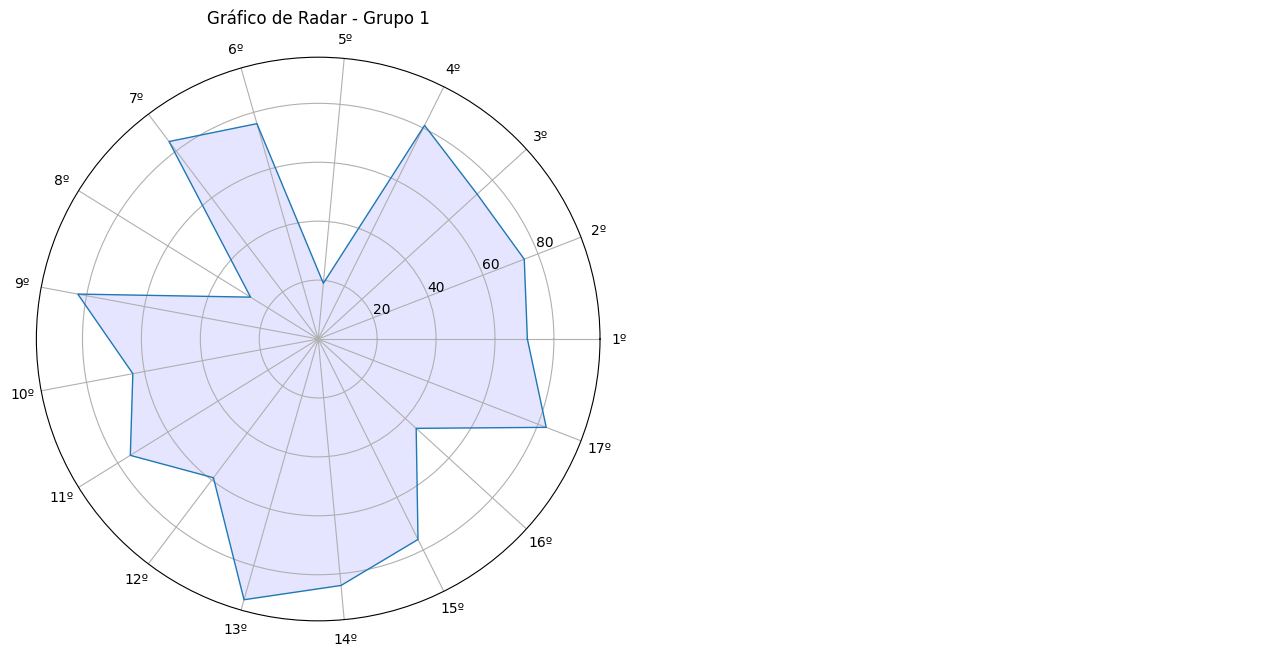

In [21]:
def crear_radar_modificado(df, grupo, nombre_grupo):
    categorias = grupo
    N = len(categorias)
    etiquetas_personalizadas = [f'{i+1}º' for i in range(N)]

    valores = df[categorias].values.flatten().tolist()
    valores += valores[:1]

    # Calcula los ángulos de los ejes del radar
    angulos = [n / float(N) * 2 * pi for n in range(N)]
    angulos += angulos[:1]

    # Inicializa el gráfico de radar
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9), subplot_kw=dict(polar=True))

    # Dibuja los ejes con las etiquetas en el primer eje
    ax1.plot(angulos, valores, linewidth=1, linestyle='solid')
    ax1.fill(angulos, valores, 'b', alpha=0.1)
    ax1.set_xticks(angulos[:-1])
    ax1.set_xticklabels(etiquetas_personalizadas)
    ax1.set_title(f'Gráfico de Radar - {nombre_grupo}')

    # Crea un segundo eje en blanco a la derecha
    ax2.axis('off')

    plt.show()

# Ejemplo de uso
crear_radar_modificado(enzoperez_grupo_1, grupo_1, 'Grupo 1')

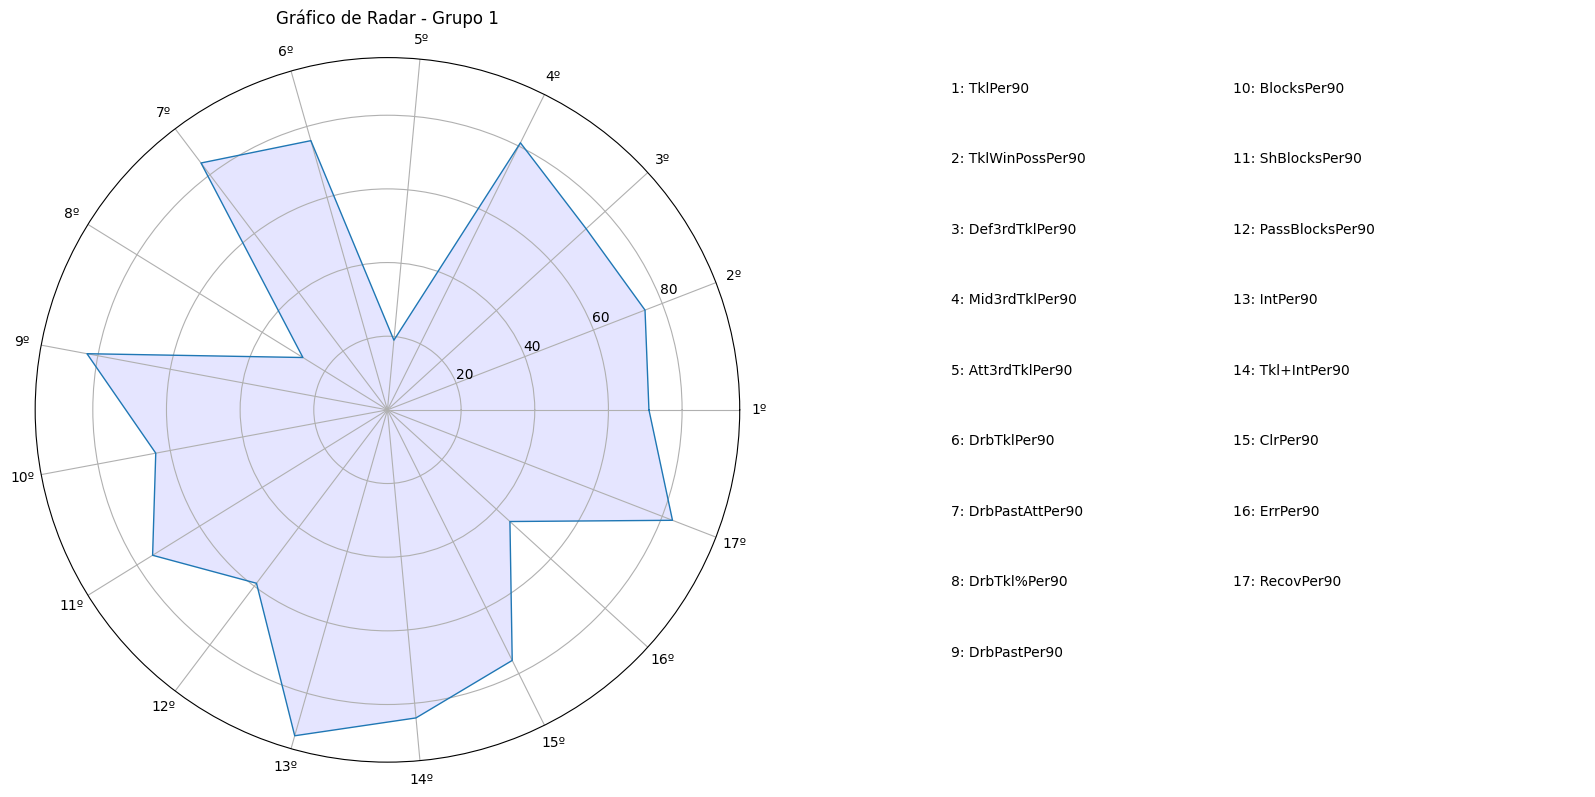

In [22]:
def crear_radar_modificado(df, grupo, nombre_grupo):
    categorias = grupo
    N = len(categorias)
    etiquetas_personalizadas = [f'{i+1}º' for i in range(N)]

    valores = df[categorias].values.flatten().tolist()
    valores += valores[:1]

    # Calcula los ángulos de los ejes del radar
    angulos = [n / float(N) * 2 * np.pi for n in range(N)]
    angulos += angulos[:1]

    # Inicializa el gráfico de radar
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12), subplot_kw=dict(polar=True))

    # Dibuja los ejes con las etiquetas en el primer eje
    ax1.plot(angulos, valores, linewidth=1, linestyle='solid')
    ax1.fill(angulos, valores, 'b', alpha=0.1)
    ax1.set_xticks(angulos[:-1])
    ax1.set_xticklabels(etiquetas_personalizadas)
    ax1.set_title(f'Gráfico de Radar - {nombre_grupo}')


    ax2.axis('off')

    half = (N + 1) // 2
    for i, categoria in enumerate(categorias):
        col = 0.1 if i < half else 0.5
        row = 0.95 - (i % half) * 0.1
        ax2.text(col, row, f'{i+1}: {categoria}', transform=ax2.transAxes, fontsize=10)

    

# Ejemplo de uso
# Suponiendo que 'enzoperez_grupo_1' y 'grupo_1' están definidos previamente
crear_radar_modificado(enzoperez_grupo_1, grupo_1, 'Grupo 1')

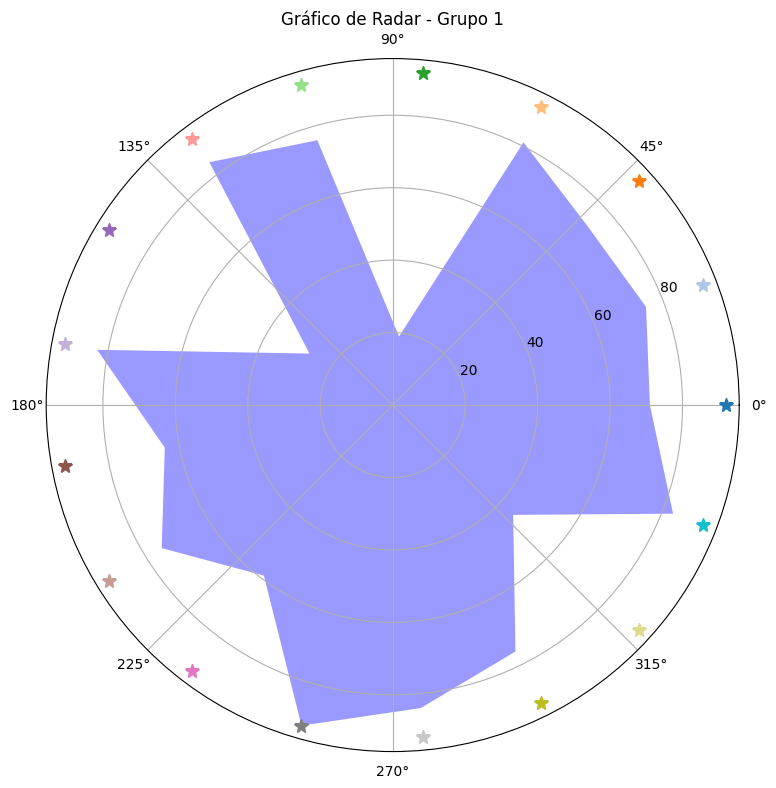

In [23]:
def crear_radar(df, grupo, nombre_grupo):
    categorias = grupo
    N = len(categorias)

    valores = df[categorias].values.flatten().tolist()
    valores += valores[:1]

    # Calcula los ángulos de los ejes del radar
    angulos = [n / float(N) * 2 * pi for n in range(N)]
    angulos += angulos[:1]

    # Inicializa el gráfico de radar
    fig, ax = plt.subplots(figsize=(16, 9), subplot_kw={'projection': 'polar'})

    # Dibuja los asteriscos de colores en el contorno del radar
    for i, cat in enumerate(categorias):
        color = plt.cm.tab20(i / N)  # Colores del mapa 'tab20'
        ax.plot(angulos[i], max(valores), marker='*', markersize=10, color=color, label=cat)

    # Rellena el área
    ax.fill(angulos, valores, 'blue', alpha=0.4)

    # Añade el título
    plt.title(f'Gráfico de Radar - {nombre_grupo}')

   

    # Muestra el gráfico
    plt.show()

# Ejemplo de uso
crear_radar(enzoperez_grupo_1, grupo_1, 'Grupo 1')


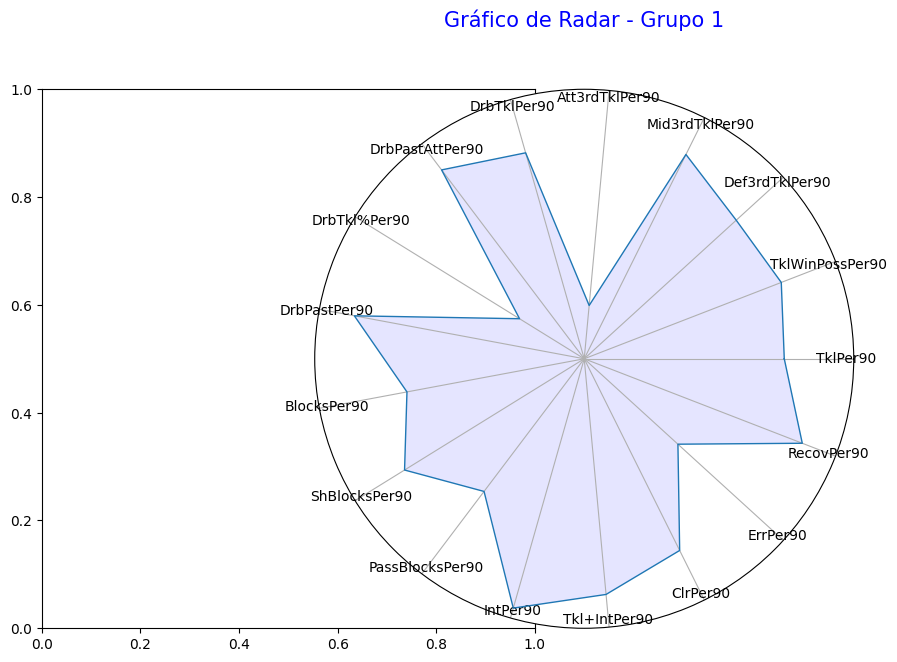

In [24]:
# Función para crear el gráfico de radar
def crear_radar(df, grupo, nombre_grupo):
    categorias = grupo
    N = len(categorias)

    valores = df[categorias].values.flatten().tolist()
    valores += valores[:1]

    # Calcula los ángulos de los ejes del radar
    angulos = [n / float(N) * 2 * pi for n in range(N)]
    angulos += angulos[:1]

    # Inicializa el gráfico de radar
    ax = plt.subplot(111, polar=True)

    # Dibuja uno por uno los ejes con las etiquetas
    plt.xticks(angulos[:-1], categorias, fontsize=10)

    # Dibuja los valores
    ax.plot(angulos, valores, linewidth=1, linestyle='solid')

    # Rellena el área
    ax.fill(angulos, valores, 'b', alpha=0.1)

    # Añade el título
    plt.title(f'Gráfico de Radar - {nombre_grupo}', size=15, color='blue', y=1.1)

    # Alejar las etiquetas de los ejes
    for label, angle in zip(ax.get_xticklabels(), angulos):
        x, y = label.get_position()
        label.set_position((x, y + 0.1))

    # Ocultar las etiquetas de los ejes
    ax.yaxis.set_visible(False)

# Crear los gráficos de radar
plt.figure(figsize=(14, 7))

plt.subplot(121)
crear_radar(enzoperez_grupo_1, grupo_1, 'Grupo 1')

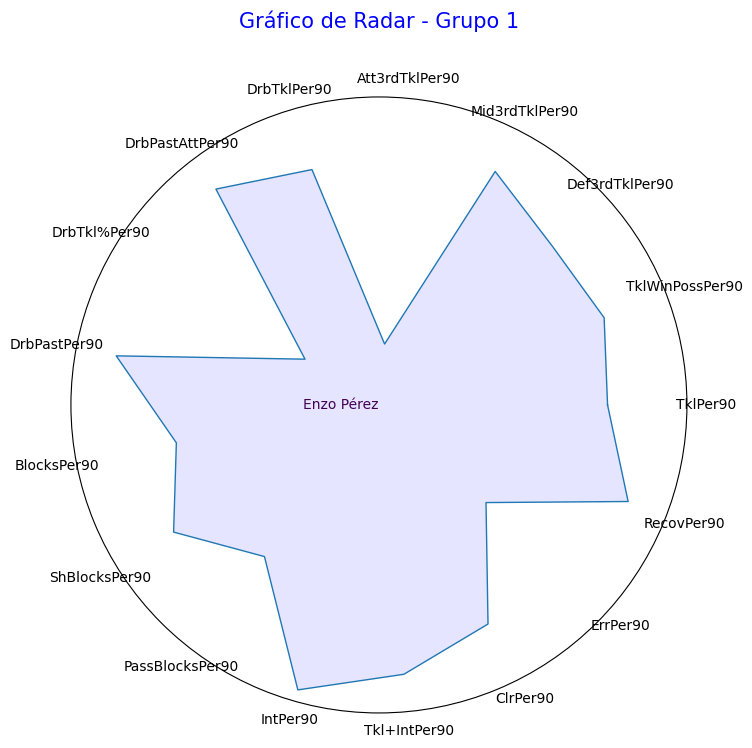

In [25]:
# Función para crear el gráfico de radar con colores para los nombres
def crear_radar(df, grupo, nombre_grupo):
    categorias = grupo
    N = len(categorias)

    valores = df[categorias].values.flatten().tolist()
    valores += valores[:1]

    # Calcula los ángulos de los ejes del radar
    angulos = [n / float(N) * 2 * pi for n in range(N)]
    angulos += angulos[:1]

    # Inicializa el gráfico de radar
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # Dibuja uno por uno los ejes con las etiquetas
    plt.xticks(angulos[:-1], categorias, fontsize=10)

    # Dibuja los valores
    ax.plot(angulos, valores, linewidth=1, linestyle='solid')

    # Rellena el área
    ax.fill(angulos, valores, 'b', alpha=0.1)

    # Añade el título
    plt.title(f'Gráfico de Radar - {nombre_grupo}', size=15, color='blue', y=1.1)

    # Añadir referencia de colores a la izquierda del radar
    colores = plt.cm.viridis(np.linspace(0, 1, len(df)))
    for i, (nombre, color) in enumerate(zip(df['Nombre'], colores)):
        ax.text(-0.3, i / len(df) * 2 * pi, nombre, ha='right', va='center', fontsize=10, color=color)

    # Ocultar las etiquetas de los ejes
    ax.yaxis.set_visible(False)

    # Eliminar los ejes de referencia
    plt.grid(False)

crear_radar(enzoperez_grupo_1, grupo_1, 'Grupo 1')

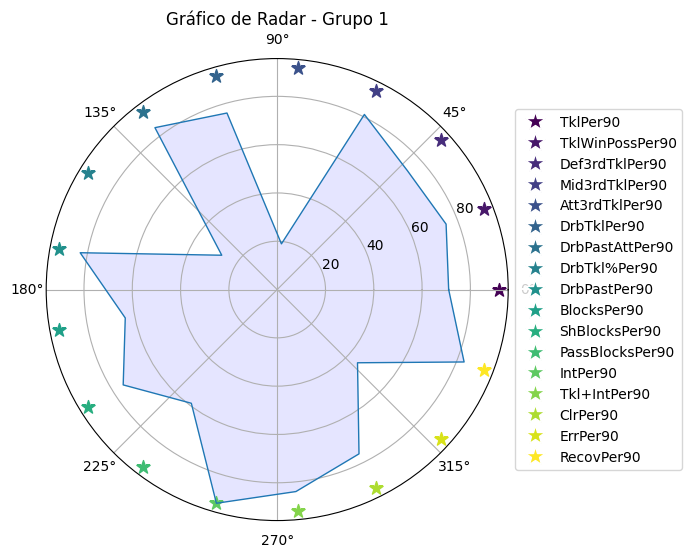

In [26]:
def crear_radar(df, grupo, nombre_grupo):
    categorias = grupo
    N = len(categorias)

    valores = df[categorias].values.flatten().tolist()
    valores += valores[:1]

    # Calcula los ángulos de los ejes del radar
    angulos = [n / float(N) * 2 * pi for n in range(N)]
    angulos += angulos[:1]

    # Inicializa el gráfico de radar
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

    # Dibuja los valores
    ax.plot(angulos, valores, linewidth=1, linestyle='solid')

    # Rellena el área
    ax.fill(angulos, valores, 'b', alpha=0.1)

    # Añade el título
    ax.set_title(f'Gráfico de Radar - {nombre_grupo}')

    # Añade asteriscos de colores en lugar de nombres de categorías
    colores = plt.cm.viridis(np.linspace(0, 1, N))
    for i, color in enumerate(colores):
        ax.scatter(angulos[i], max(valores), color=color, marker='*', s=100)

    

    # Crear una leyenda de colores fuera del radar
    plt.legend(handles=[plt.Line2D([0], [0], marker='*', color='w', markerfacecolor=colores[i], markersize=15, label=categorias[i]) for i in range(N)],
               loc='center left', bbox_to_anchor=(1, 0.5))


crear_radar(enzoperez_grupo_1, grupo_1, 'Grupo 1')

In [27]:
def radar_factory(num_vars, frame='polygon'):
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta



def crear_radar(df, grupo, nombre_grupo):
    categorias = grupo
    N = len(categorias)

    valores = df[categorias].values.flatten().tolist()
    valores += valores[:1]

    # Calcula los ángulos de los ejes del radar
    angulos = [n / float(N) * 2 * pi for n in range(N)]
    angulos += angulos[:1]

    # Inicializa el gráfico de radar
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(projection='radar'))

    # Dibuja los valores
    ax.plot(angulos, valores, linewidth=1, linestyle='solid')

    # Rellena el área
    ax.fill(angulos, valores, 'b', alpha=0.1)

    # Añade el título
    ax.set_title(f'Gráfico de Radar - {nombre_grupo}')

    # Añade asteriscos de colores en el contorno del radar
    colores = plt.cm.viridis(np.linspace(0, 1, N))
    for i, color in enumerate(colores):
        r = max(valores)
        x = r * np.cos(angulos[i])
        y = r * np.sin(angulos[i])
        ax.scatter(x, y, color=color, marker='*', s=100)

    # Crear una leyenda de colores fuera del radar
    plt.legend(handles=[plt.Line2D([0], [0], marker='*', color='w', markerfacecolor=colores[i], markersize=15, label=categorias[i]) for i in range(N)],
               loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()


grupo_1 = [
    'TklPer90',
    'TklWinPossPer90',
    'Def3rdTklPer90',
    'Mid3rdTklPer90',
    'Att3rdTklPer90',
    'DrbTklPer90',
    'DrbPastAttPer90',
    'DrbTkl%Per90',
    'DrbPastPer90',
    'BlocksPer90',
    'ShBlocksPer90',
    'PassBlocksPer90',
    'IntPer90',
    'Tkl+IntPer90',
    'ClrPer90',
    'ErrPer90',
    'RecovPer90'
]

crear_radar(enzoperez_grupo_1, grupo_1, 'Grupo 1')

ValueError: Unknown projection 'radar'

<Figure size 1000x600 with 0 Axes>

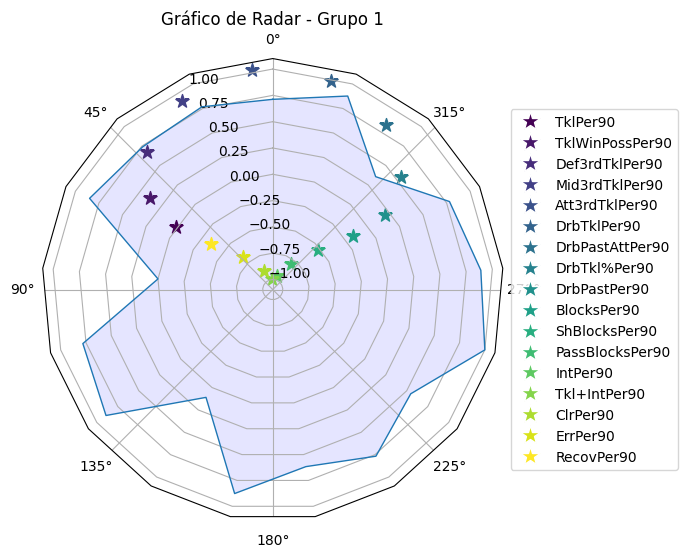

In [ ]:
def radar_factory(num_vars, frame='polygon'):
    """
    Create a radar chart with `num_vars` Axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding Axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)

def crear_radar(df, grupo, nombre_grupo):
    categorias = grupo
    N = len(categorias)

    valores = df[categorias].values.flatten()  # Aplana el array
    min_vals = np.min(valores, axis=0)
    max_vals = np.max(valores, axis=0)
    valores = (valores - min_vals) / (max_vals - min_vals + 1e-10)

    # Calcula los ángulos de los ejes del radar
    theta = np.linspace(0, 2*np.pi, N, endpoint=False)

    # Inicializa el gráfico de radar
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(projection='radar'))
    # Dibuja los valores
    ax.plot(theta, valores, linewidth=1, linestyle='solid')

    # Rellena el área
    ax.fill(theta, valores, 'b', alpha=0.1)

    # Añade el título
    ax.set_title(f'Gráfico de Radar - {nombre_grupo}')

    # Añade asteriscos de colores en el contorno del radar
    colores = plt.cm.viridis(np.linspace(0, 1, N))
    for i, color in enumerate(colores):
        r = 1  # Valor máximo en la nueva escala
        x = r * np.cos(theta[i])
        y = r * np.sin(theta[i])
        ax.scatter(x, y, color=color, marker='*', s=100)

    # Crear una leyenda de colores fuera del radar
    plt.legend(handles=[plt.Line2D([0], [0], marker='*', color='w', markerfacecolor=colores[i], markersize=15, label=categorias[i]) for i in range(N)],
               loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

crear_radar(enzoperez_grupo_1, grupo_1, 'Grupo 1')